# Player clustering

## Configuración del entorno y preparación de los datos

Importo las librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import output

from ipywidgets import interact, widgets
from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Levanto el dataset a utilizar:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Fbref.com: big 5 leagues player stats 2021-22
df_stats = pd.read_csv('/content/drive/MyDrive/Maestría en Explotación de Datos/2 - Maestría/Taller de tesis 1/data/dataset_final.csv', index_col = 0)

Se van a ignorar algunas variables:

In [4]:
cols_to_ignore = ['Age', 'PK', 'Gls', 'G+A', 'xG+xAG', 'xG', 'npxG+xAG', 'G+A_minus_PK', 'G_minus_xG_Expected', 'Cmp_Total', 'Cmp_Short', 'Cmp_Medium', 'Cmp_Long', 'Live_Pass', 'Dead_Pass', 'TklW_Tackles', 'Min_Playing.Time', \
                'Def 3rd_Tackles', 'Mid 3rd_Tackles', 'Att 3rd_Tackles', 'Tkl_Challenges', 'Lost_Challenges', 'Blocks_Blocks', 'Tkl+Int', 'Touches_Touches', 'Succ_Take', 'Tkld_percent_Take', 'MP_Playing.Time', 'Mn_per_MP_Playing.Time', \
                'Mins_90_Playing.Time', 'Won_Aerial', 'Lost_Aerial', 'market_value_2021', 'market_value_2022', 'Pos_unique', 'Squad', 'Comp', 'Player', 'Nation', 'Pos']

In [5]:
df_stats_reduced = df_stats.drop(cols_to_ignore, axis=1)

In [6]:
for i in df_stats_reduced.columns:
  print(i)

PKatt
CrdY
CrdR
Ast
G_minus_PK
xAG
npxG
SoT_percent
Sh_per_90
SoT_per_90
G_per_Sh
G_per_SoT
Dist
FK
npxG_per_Sh_Expected
np:G_minus_xG_Expected
Att_Total
Cmp_percent_Total
TotDist_Total
PrgDist_Total
Att_Short
Cmp_percent_Short
Att_Medium
Cmp_percent_Medium
Att_Long
Cmp_percent_Long
A_minus_xAG
KP
Final_Third
PPA
CrsPA
PrgP
FK_Pass
TB_Pass
Sw_Pass
Crs_Pass
TI_Pass
CK_Pass
Off_Outcomes
Blocks_Outcomes
SCA90_SCA
PassLive_SCA
PassDead_SCA
TO_SCA
Sh_SCA
Fld_SCA
Def_SCA
GCA90_GCA
PassLive_GCA
PassDead_GCA
TO_GCA
Sh_GCA
Fld_GCA
Def_GCA
Tkl_Tackles
Att_Challenges
Tkl_percent_Challenges
Sh_Blocks
Pass_Blocks
Int
Clr
Err
Def Pen_Touches
Def 3rd_Touches
Mid 3rd_Touches
Att 3rd_Touches
Att Pen_Touches
Att_Take
Succ_percent_Take
Carries_Carries
TotDist_Carries
PrgDist_Carries
PrgC_Carries
Final_Third_Carries
CPA_Carries
Mis_Carries
Dis_Carries
Rec_Receiving
PrgR_Receiving
Min_percent_Playing.Time
Mn_per_Start_Starts
Mn_per_Sub_Subs
PPM_Team.Success
onG_Team.Success
onGA_Team.Success
plus_per__minu

## Normalización de las variables

Estandarizo las variables:

In [7]:
scaler = StandardScaler()
df_stats_scaled = scaler.fit_transform(df_stats_reduced)

## Reducción de la dimensionalidad del dataset

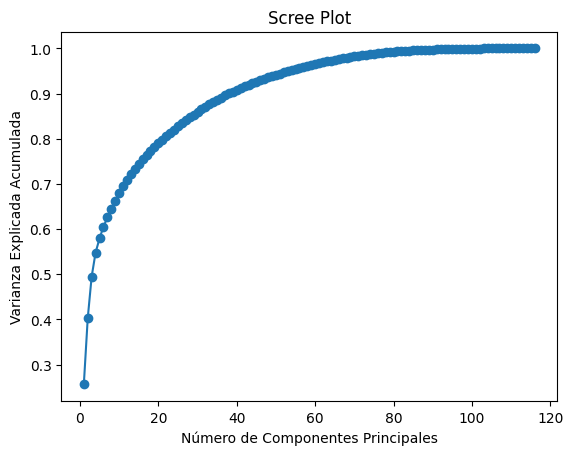

In [8]:
# Realizar análisis de componentes principales (PCA)
pca = PCA()
principal_components = pca.fit_transform(df_stats_scaled)

# Obtener la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar el scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree Plot')
plt.show()

In [9]:
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(df_stats_scaled)
pca.n_components_

38

In [10]:
principal_components.shape

(1983, 38)

## K-Means

In [11]:
evaluation = []

for k in range(2,11):
  #Como siempre, suele ser una buena práctica fijar la semilla
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(principal_components)
  labels = kmeans.labels_
  wcss = kmeans.inertia_
  silhouette = silhouette_score(principal_components, labels, metric='euclidean')

  evaluation.append({'k':k, 'wcss': wcss, 'silhouette':silhouette})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

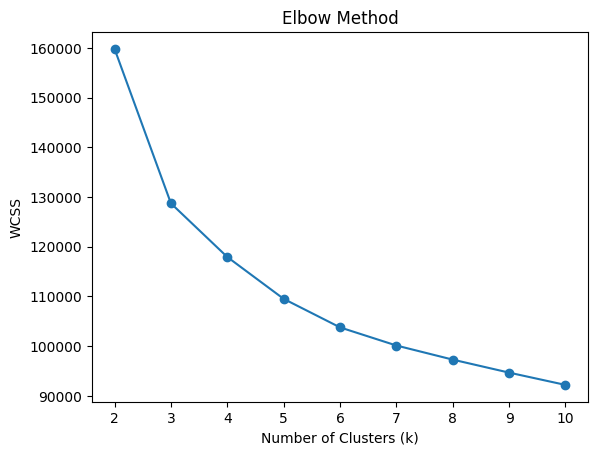

In [12]:
# Extract the 'k' and 'wcss' values from the list of dictionaries
k_values = [i['k'] for i in evaluation]
wcss_values = [i['wcss'] for i in evaluation]

# Plot the elbow curve
plt.plot(k_values, wcss_values, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

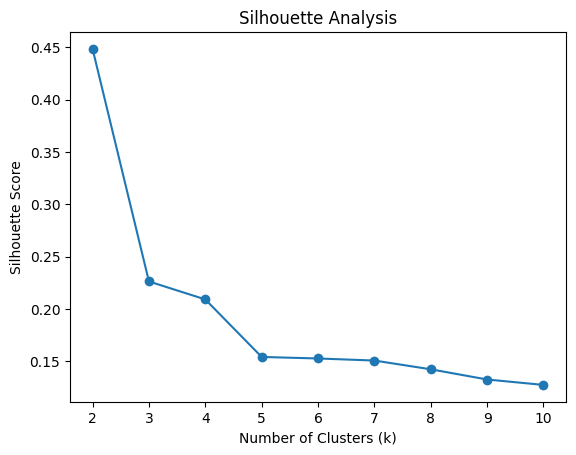

In [13]:
k_values = [i['k'] for i in evaluation]
silhouette_values = [i['silhouette'] for i in evaluation]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_values, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

### Kmeans con 5 clusters

In [14]:
# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(principal_components)

# Get the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_stats['cluster'] = cluster_labels

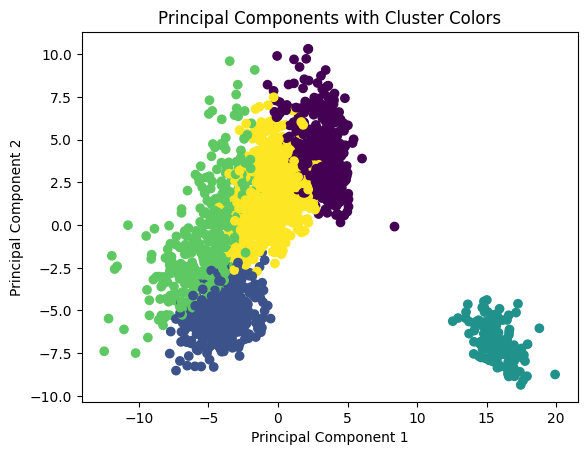

In [16]:
# Plot the first two principal components with cluster colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components with Cluster Colors')
plt.show()

In [17]:
df_stats.shape

(1983, 157)

#### Analizo los clusters resultantes

In [18]:
pivot_clustering = df_stats.pivot_table(values='Player', index='Pos_unique', columns='cluster', aggfunc='count')

In [19]:
pivot_clustering = pivot_clustering.fillna(0)
pivot_clustering

cluster,0,1,2,3,4
Pos_unique,,,,,
DF,393.0,2.0,0.0,51.0,317.0
FW,0.0,303.0,0.0,130.0,7.0
GK,0.0,0.0,142.0,0.0,0.0
MF,31.0,49.0,0.0,184.0,374.0


cluster 0: Defensores
cluster 1: Delanteros (+finalizadores)
cluster 2: Arqueros
cluster 3: volantes centrales & extremos/enganchas ¿creadores de juego?
cluster 4: laterales & volantes de marca

In [20]:
#df_stats[(df_stats['cluster'] == 4) & (df_stats['Nation'] == 'ARG')].sample(5)
df_stats[df_stats['cluster'] == 4].sample(10)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster
1072,Lyon,Ligue 1,Emerson Palmieri,ITA,DF,26,0.0,0.0,0.12,0.04,0.04,0.08,0.12,0.04,0.12,0.04,0.14,0.18,0.04,0.18,31.3,0.64,0.20,0.06,0.20,22.7,0.24,0.06,0.00,0.00,61.15,72.22,84.7,939.29,310.79,32.98,35.44,93.1,22.58,26.51,85.2,3.85,6.79,56.7,-0.06,1.23,3.73,0.60,0.24,4.01,61.63,10.52,1.07,0.04,0.16,2.74,8.33,1.11,0.08,1.03,2.50,1.90,0.44,0.00,0.08,0.04,0.04,0.20,0.20,0.00,0.00,0.00,0.00,0.0,1.83,0.99,0.63,0.87,0.32,0.87,1.35,64.7,0.48,0.91,0.32,0.60,1.07,2.90,2.62,0.00,83.45,3.57,23.61,41.83,18.85,1.39,1.87,1.19,63.8,36.2,49.64,266.31,143.17,2.94,2.22,0.48,1.59,0.24,54.76,4.56,29,2264,78,66.2,25.2,84.0,1.23,1.59,1.67,1.55,0.12,-0.81,0.00,0.60,0.91,0.04,0.00,0.04,0.0,4.84,1.67,1.15,59.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000000.0,14000000.0,0.90,DF,0.0,0.540984,2.82,4
1533,Roma,Serie A,Rick Karsdorp,NED,"DF,FW",26,0.0,0.0,0.28,0.03,0.00,0.06,0.06,0.00,0.06,0.00,0.15,0.15,0.00,0.15,50.0,0.06,0.03,0.00,0.00,25.7,0.00,0.04,-0.00,-0.00,45.81,56.84,80.6,838.19,266.50,19.41,22.19,87.5,20.47,24.12,84.8,5.12,7.91,64.8,-0.09,1.31,3.47,1.78,0.75,4.69,47.69,8.78,0.47,0.09,0.34,3.22,8.31,0.00,0.38,1.03,2.90,2.53,0.12,0.16,0.00,0.06,0.03,0.12,0.12,0.00,0.00,0.00,0.00,0.0,1.66,1.19,1.03,0.41,0.22,0.88,1.56,56.0,0.69,0.69,0.16,0.53,1.06,2.72,0.81,0.03,62.75,1.84,16.81,28.84,17.84,1.25,0.72,0.41,56.5,43.5,33.81,146.94,71.03,1.44,1.41,0.31,0.97,0.25,40.72,6.56,36,2883,80,84.3,32.0,86.0,0.91,1.75,1.53,1.06,0.47,0.30,0.03,0.84,0.41,0.00,0.00,0.03,0.0,5.59,0.16,0.38,29.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12000000.0,13000000.0,0.89,DF,0.0,0.716867,0.54,4
1974,Wolves,Premier League,João Moutinho,POR,MF,34,0.0,0.0,0.12,0.00,0.06,0.03,0.09,0.06,0.09,0.04,0.08,0.12,0.04,0.12,35.0,0.61,0.21,0.10,0.29,24.3,0.12,0.06,0.02,0.02,51.52,61.79,83.4,954.58,229.64,21.21,23.61,89.9,22.24,25.00,89.0,6.70,10.03,66.8,-0.05,1.18,5.15,0.55,0.12,5.94,56.09,5.58,2.91,0.15,0.76,3.27,0.21,2.33,0.12,1.06,2.48,1.61,0.67,0.03,0.12,0.00,0.06,0.12,0.09,0.03,0.00,0.00,0.00,0.0,2.24,1.18,1.03,0.82,0.39,0.91,3.21,28.3,2.30,1.45,0.24,1.21,1.03,3.27,1.09,0.06,70.42,1.91,15.

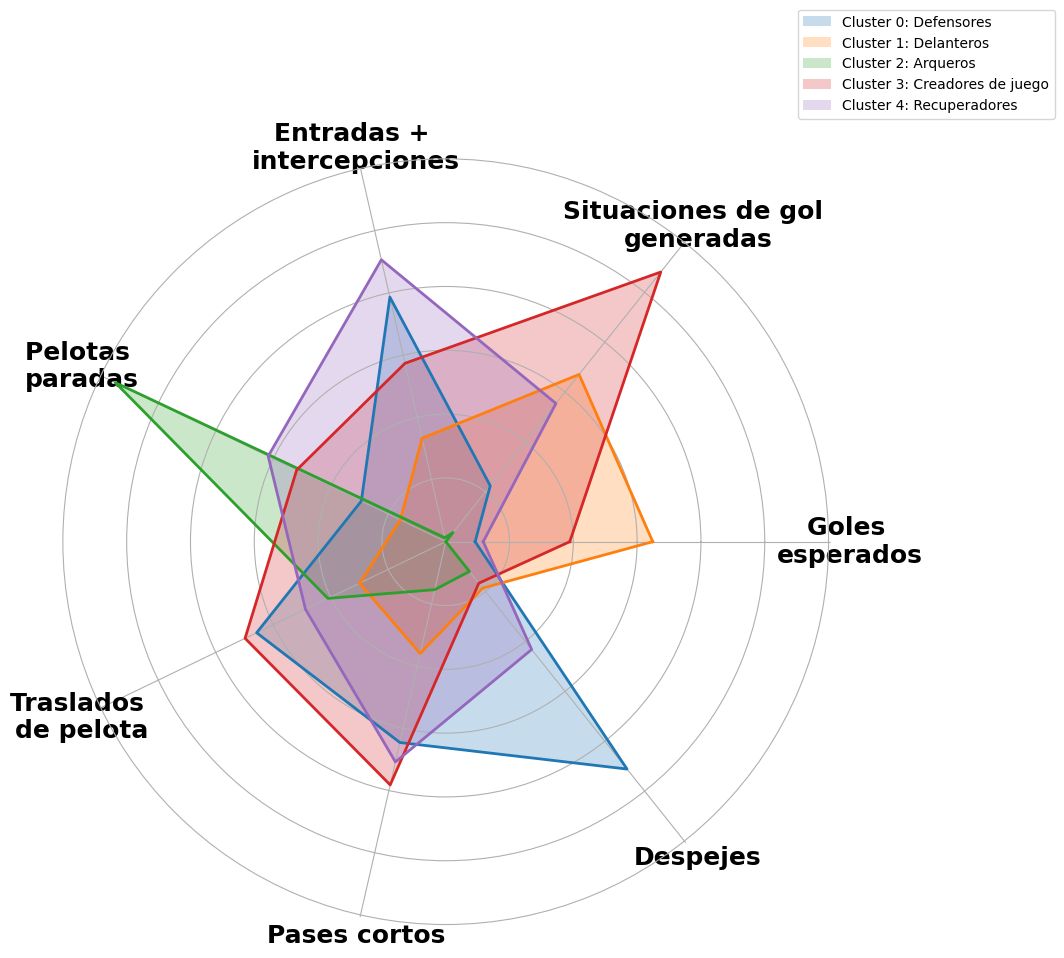

In [21]:
variables = ['xG', 'SCA90_SCA', 'Tkl+Int', 'Dead_Pass', 'PrgDist_Carries', 'Cmp_Short', 'Clr']
etiquetas_personalizadas = ['Goles \nesperados', 'Situaciones de gol \ngeneradas', 'Entradas + \nintercepciones', 'Pelotas \nparadas', 'Traslados \nde pelota', 'Pases cortos', 'Despejes']

# Normalizar los valores de las variables
df_normalized = (df_stats[variables] - df_stats[variables].min()) / (df_stats[variables].max() - df_stats[variables].min())

df_normalized['Cluster'] = df_stats['cluster']

# Calcular los promedios de las variables para cada cluster
promedios_clusters = df_normalized.groupby('Cluster')[variables].mean()

# Configuración del gráfico
angulos = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
angulos += angulos[:1]  # Repetir el primer ángulo para cerrar el gráfico

# Crear la subtrama polar
fig = plt.figure(figsize=(10, 10))
axs = plt.subplot(111, polar=True)

# Crear los gráficos de radar para cada cluster
for i in range(len(promedios_clusters)):
    promedios = promedios_clusters.loc[i].values.tolist()
    promedios += promedios[:1]  # Repetir el primer valor para cerrar el gráfico

    axs.fill(angulos, promedios, alpha=0.25, label='Cluster {}'.format(i))  # Rellenar el área interior y agregar etiqueta de cluster
    axs.plot(angulos, promedios, linewidth=2)  # Dibujar el contorno

# Configuración de la subtrama
axs.set_xticks(angulos[:-1])
axs.set_xticklabels(etiquetas_personalizadas, fontsize=18, fontweight='bold')  # Establecer etiquetas personalizadas en el eje x
axs.set_yticklabels([])  # Ocultar etiquetas numéricas en el eje y
axs.spines['polar'].set_visible(False)  # Ocultar los ejes radiales

# Cambiar nombres de los clusters
nombres_clusters = {
    0: 'Cluster 0: Defensores',
    1: 'Cluster 1: Delanteros',
    2: 'Cluster 2: Arqueros',
    3: 'Cluster 3: Creadores de juego',
    4: 'Cluster 4: Recuperadores'
}

# Agregar leyenda con los nombres de los clusters
handles, labels = axs.get_legend_handles_labels()
nuevas_etiquetas = [nombres_clusters[int(label.split()[1])] for label in labels]
plt.legend(handles, nuevas_etiquetas, loc='upper right', bbox_to_anchor=(1.3, 1.2))

# Mostrar el gráfico
plt.show()


## xG/npxG, SCA90_SCA

### Con 10 clusters

In [22]:
# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(principal_components)

# Get the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df_stats['cluster_10'] = cluster_labels

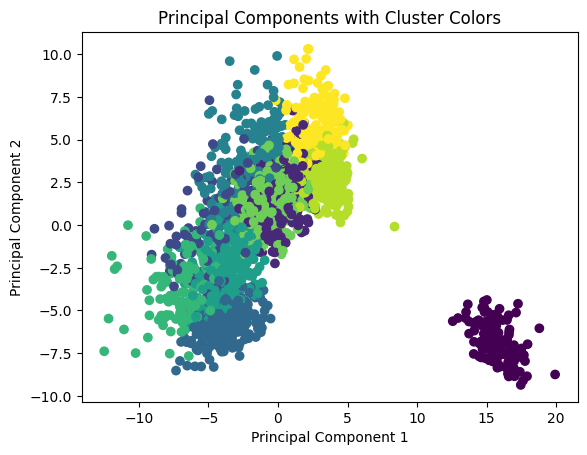

In [24]:
# Plot the first two principal components with cluster colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components with Cluster Colors')
plt.show()

In [25]:
pivot_clustering = df_stats.pivot_table(values='Player', index='Pos_unique', columns='cluster_10', aggfunc='count')

In [26]:
pivot_clustering = pivot_clustering.fillna(0)
pivot_clustering

cluster_10,0,1,2,3,4,5,6,7,8,9
Pos_unique,,,,,,,,,,
DF,0.0,21.0,22.0,0.0,38.0,14.0,1.0,268.0,243.0,156.0
FW,0.0,0.0,19.0,221.0,5.0,90.0,104.0,1.0,0.0,0.0
GK,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MF,0.0,243.0,70.0,8.0,129.0,131.0,36.0,7.0,2.0,12.0


In [27]:
#df_stats[(df_stats['cluster_10'] == 9) & (df_stats['Nation'] == 'BRA')]#.sample(10)
df_stats[df_stats['cluster_10'] == 9].sample(10)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster,cluster_10
836,Juventus,Serie A,Leonardo Bonucci,ITA,DF,34,0.13,0.13,0.04,0.00,0.22,0.00,0.22,0.09,0.09,0.21,0.03,0.24,0.11,0.14,21.4,0.63,0.13,0.14,0.67,10.7,0.0,0.17,0.01,-0.01,50.94,59.06,86.3,1161.39,498.03,11.48,12.51,91.8,29.28,31.26,93.7,9.78,13.77,71.0,-0.03,0.49,3.50,0.13,0.00,2.96,53.77,4.84,3.59,0.09,1.08,0.13,0.09,0.00,0.45,0.22,0.81,0.76,0.00,0.0,0.04,0.00,0.00,0.09,0.09,0.0,0.0,0.00,0.00,0.0,0.63,0.22,0.18,0.45,0.00,0.36,0.58,61.5,0.22,0.99,0.76,0.22,1.17,1.79,3.68,0.00,68.25,12.78,38.12,28.48,2.11,1.08,0.31,0.18,57.1,42.9,36.77,142.47,69.51,0.09,0.13,0.00,0.49,0.04,47.00,0.00,24,2005,84,58.6,22.3,89.0,0.85,1.54,1.43,1.26,0.18,-0.84,0.00,0.76,0.36,0.04,0.0,0.04,0.0,4.26,1.97,1.57,55.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,6000000.0,0.92,DF,1.0,0.349206,3.54,0,9
211,Bayern Munich,Bundesliga,Niklas Süle,GER,DF,25,0.00,0.00,0.10,0.00,0.05,0.10,0.15,0.05,0.15,0.07,0.06,0.12,0.07,0.12,37.5,0.78,0.29,0.06,0.17,18.0,0.0,0.08,-0.01,-0.01,77.75,86.62,89.8,1471.47,596.23,28.68,30.64,93.6,39.95,43.14,92.6,7.75,10.10,76.7,0.04,0.49,6.42,0.39,0.05,6.86,83.38,3.04,1.76,0.05,1.08,0.29,1.18,0.05,0.20,0.49,1.37,1.08,0.05,0.1,0.15,0.00,0.00,0.25,0.20,0.0,0.0,0.05,0.00,0.0,1.42,1.13,1.03,0.34,0.05,0.88,1.18,75.0,0.29,0.78,0.59,0.20,1.37,2.79,2.40,0.00,94.36,8.97,39.17,49.71,5.98,1.13,0.64,0.39,61.5,38.5,59.02,322.45,185.74,1.52,1.03,0.10,0.39,0.20,70.25,0.98,28,1837,66,60.0,20.4,87.0,0.98,2.29,3.14,1.08,2.06,0.73,0.00,0.49,0.05,0.05,0.0,0.00,0.0,7.75,1.96,0.59,76.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000000.0,35000000.0,0.68,DF,0.0,0.795775,2.55,0,9
1514,Rennes,Ligue 1,Loïc Bade,FRA,DF,21,0.00,0.00,0.28,0.09,0.00,0.09,0.09,0.00,0.09,0.03,0.05,0.07,0.03,0.07,0.0,0.64,0.00,0.00,0.00,14.6,0.0,0.04,-0.03,-0.03,60.09,66.88,89.8,1239.27,400.18,16.24,17.98,90.3,36.51,38.72,94.3,6.79,9.54,71.2,0.05,0.18,3.12,0.28,0.09,4.13,65.87,0.92,0.73,0.00,0.37,0.18,0.18,0.00,0.09,0.09,0.46,0.28,0.00,0.0,0.18,0.00,0.00,0.09,0.00,0.0,0.0,0.09,0.00,0.0,0.55,0.46,0.37,0.18,0.00,0.28,0.46,60.0,0.18,1.10,0.92,0.18,1.10,1.65,4.40,0.00,76.15,7.71,

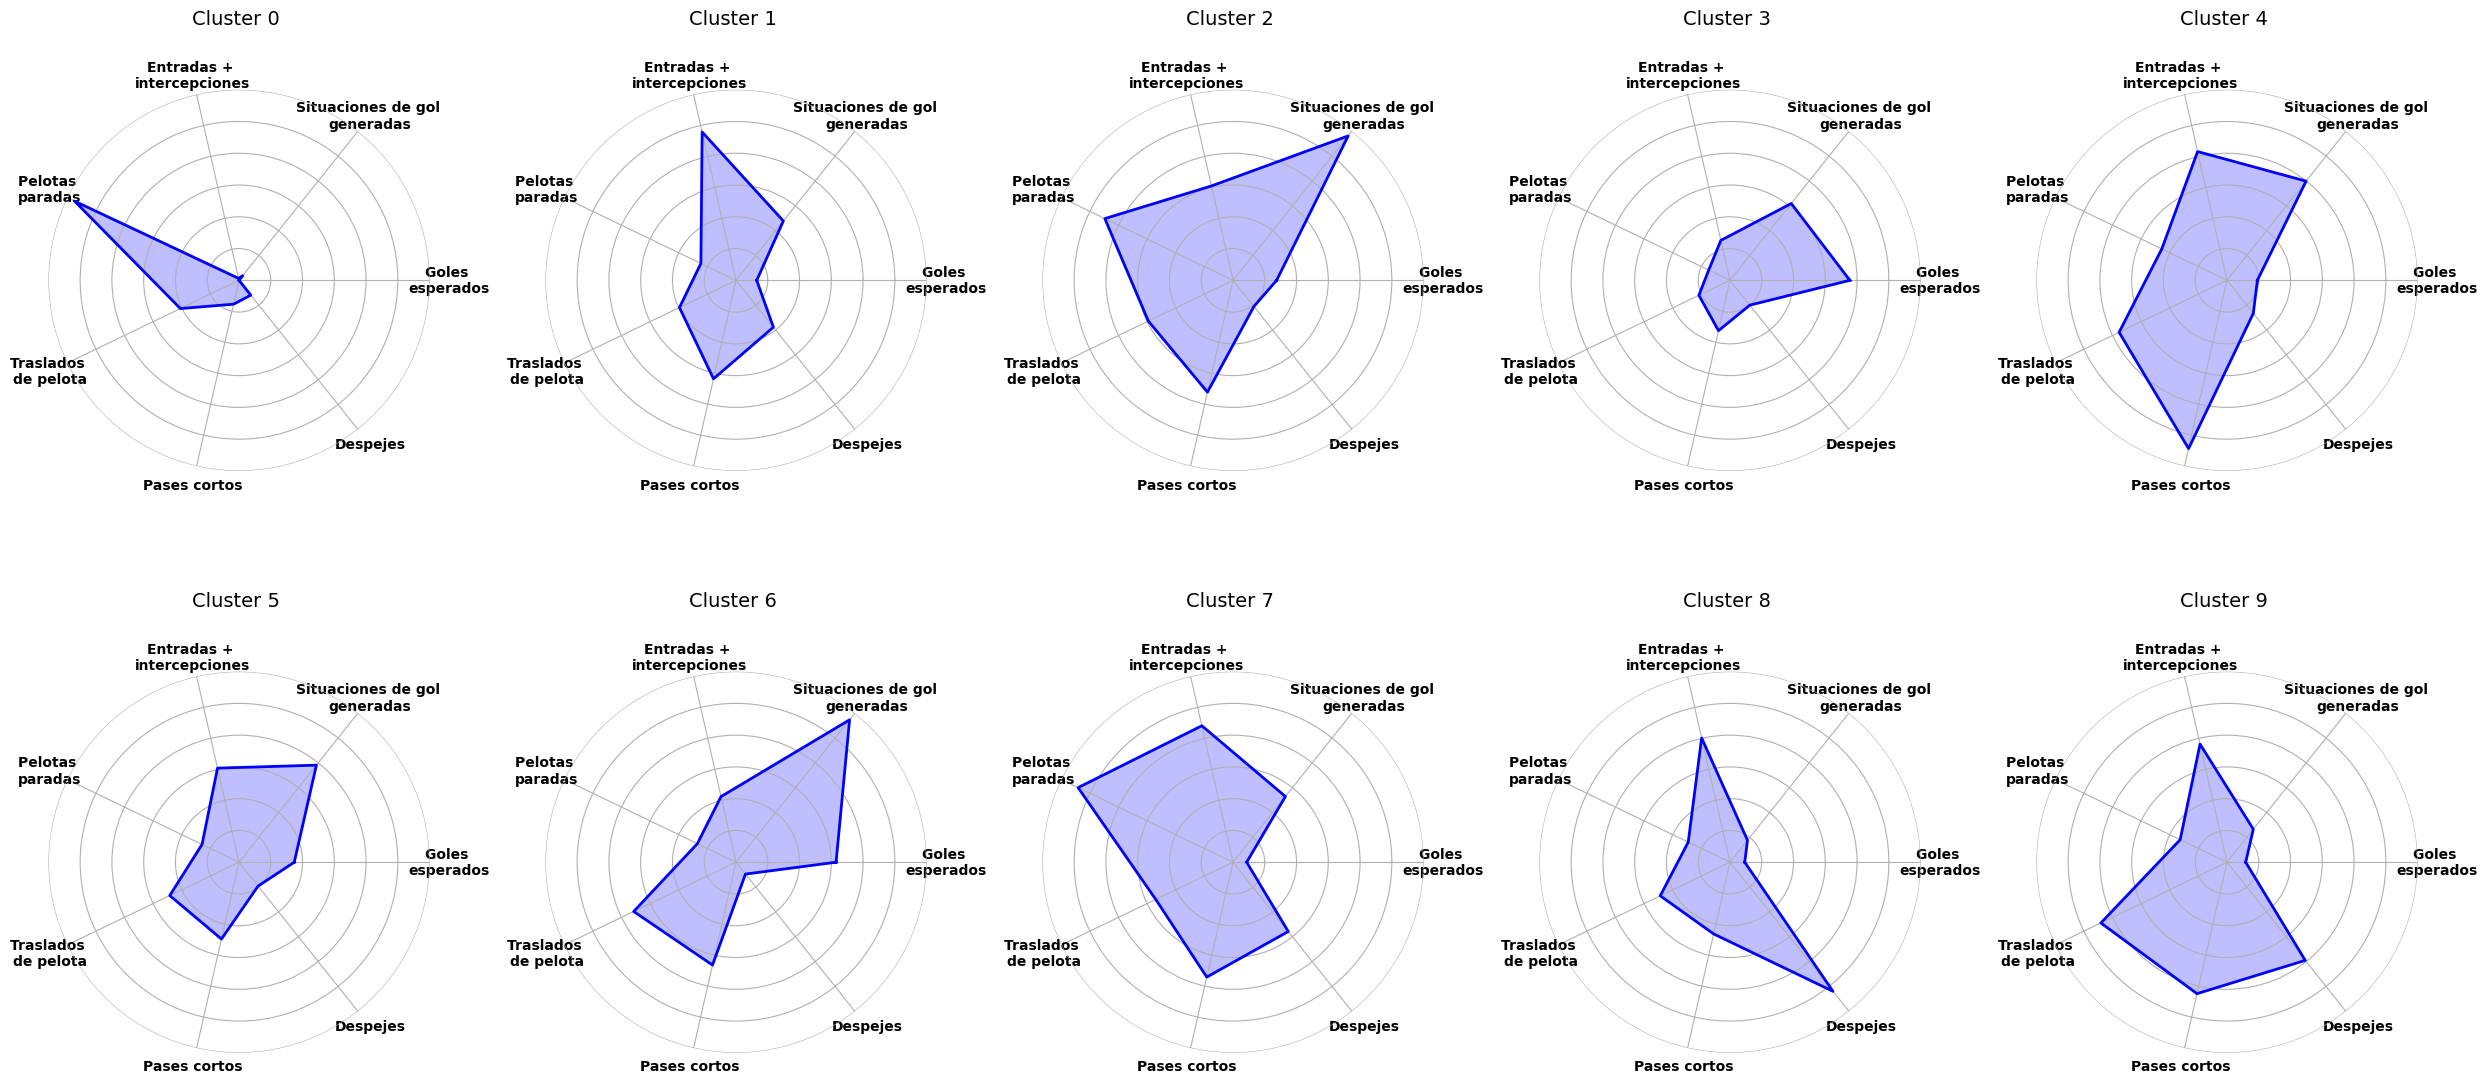

In [28]:
variables = ['npxG', 'SCA90_SCA', 'Tkl+Int', 'Dead_Pass', 'PrgDist_Carries', 'Cmp_Short', 'Clr']
etiquetas_personalizadas = ['Goles \nesperados', 'Situaciones de gol \ngeneradas', 'Entradas + \nintercepciones', 'Pelotas \nparadas', 'Traslados \nde pelota', 'Pases cortos', 'Despejes']

# Normalizar los valores de las variables
df_normalized = (df_stats[variables] - df_stats[variables].min()) / (df_stats[variables].max() - df_stats[variables].min())

df_normalized['Cluster'] = df_stats['cluster_10']

# Calcular los promedios de las variables para cada cluster
promedios_clusters = df_normalized.groupby('Cluster')[variables].mean()

# Configuración del gráfico
angulos = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
angulos += angulos[:1]  # Repetir el primer ángulo para cerrar el gráfico

# Crear los gráficos de radar para cada cluster
fig, axs = plt.subplots(2, 5, figsize=(25, 12), subplot_kw=dict(polar=True))
axs = axs.flatten()  # Aplanar la lista de subgráficos para facilitar el acceso

for i, ax in enumerate(axs):
    promedios = promedios_clusters.loc[i].values.tolist()
    promedios += promedios[:1]  # Repetir el primer valor para cerrar el gráfico

    ax.fill(angulos, promedios, 'b', alpha=0.25)  # Rellenar el área interior
    ax.plot(angulos, promedios, color='b', linewidth=2)  # Dibujar el contorno

    ax.set_title('Cluster {} \n'.format(i), fontsize=14, pad = 10)
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(etiquetas_personalizadas, fontsize=10, fontweight='bold')
    ax.set_yticklabels([])

    ax.spines['polar'].set_visible(False)  # Ocultar los ejes radiales

    #ax.set_xticks([])

    ax.set_ylim(df_normalized[variables].min().min(), df_normalized[variables].max().max()*0.6)

# Eliminar los subgráficos no utilizados
for j in range(len(promedios_clusters), len(axs)):
    fig.delaxes(axs[j])

# Ajustar los espacios entre los subgráficos
fig.tight_layout()

# Mostrar los gráficos
plt.show()

In [29]:
tabla_clusters = df_stats.groupby('cluster_10').mean()
tabla_clusters_transpuesta = tabla_clusters.T

tabla_clusters

<ipython-input-29-2945d9e30aad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabla_clusters = df_stats.groupby('cluster_10').mean()


,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster
cluster_10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28.640845,0.000000,0.000211,0.057535,0.006408,0.000000,0.003521,0.003521,0.000000,0.003521,0.000211,0.001901,0.002113,0.000000,0.001901,1.408451,0.001479,0.000423,0.000000,0.000000,0.982394,0.000000,0.001338,-0.000211,0.000000,24.326690,34.045211,71.164085,687.634789,500.095563,4.735986,4.776549,99.028873,10.988662,11.208662,97.916901,8.429366,17.741831,48.247183,0.001479,0.022535,0.507817,0.017535,0.000000,0.018944,23.921831,10.010634,2.667746,0.003380,0.087817,0.000000,0.002535,0.000000,0.112817,0.020070,0.130775,0.093592,0.036338,0.000000,0.000352,0.000352,0.000000,0.012606,0.010915,0.001620,0.000000,0.000000,0.000000,0.000000,0.023310,0.012676,0.023099,0.000211,0.000000,0.019789,0.052746,21.803521,0.033380,0.004859,0.000000,0.004859,0.024225,0.047254,0.465563,0.067465,36.371761,30.001549,36.057958,0.323169,0.005634,0.003592,0.013662,0.013028,22.887324,1.056338,20.183169,106.099437,64.229437,0.000563,0.003732,0.002324,0.027606,0.004296,16.064648,0.001197,24.852113,2221.281690,89.021127,66.232394,24.680986,89.507042,0.328239,1.310352,1.382887,1.475704,-0.093662,-0.045493,0.000986,0.022394,0.132113,0.000000,0.000000,0.016479,0.004437,1.295704,0.238732,0.028239,87.267606,1.472958,4.311268,69.219718,24.577465,13.166901,1.33,0.276761,-0.093099,37.670423,37.696479,34.483099,52.521127,41.914789,5.266197,1.192183,14.933099,8.525893e+06,8.026429e+06,0.989577,0.000000,0.211672,0.266972,2.000000
1,25.602273,0.002538,0.002727,0.279508,0.014205,0.051402,0.045038,0.096061,0.048902,0.093523,0.061212,0.049773,0.111212,0.058788,0.108750,23.825000,0.849091,0.216780,0.052424,0.194962,20.630682,0.025265,0.065947,-0.010189,-0.010303,35.033636,43.693333,79.582955,594.732652,178.428144,16.505152,19.075568,86.024621,13.934924,16.351856,84.401136,3.358598,5.421288,62.035606,-0.005038,0.650568,3.316288,0.464318,0.085682,4.011591,41.402159,2.136591,1.102197,0.096818,0.420909,0.910341,0.619848,0.280492,0.154280,0.779167,1.695152,1.291098,0.122083,0.055455,0.088939,0.076894,0.059773,

In [30]:
# Iterar sobre las columnas y encontrar el cluster con el valor máximo en cada una

cluster_characteristics = {}
for columna in tabla_clusters.columns:
  cluster_max_valor = tabla_clusters_transpuesta.loc[columna].idxmax()

  cluster_max_valor = int(cluster_max_valor)

  if cluster_max_valor in cluster_characteristics:
    cluster_characteristics[cluster_max_valor].append(columna)
  else:
    cluster_characteristics[cluster_max_valor] = [columna]

In [31]:
import json
from pprint import pprint

pprint(json.dumps(cluster_characteristics, sort_keys=True, indent=4))

('{\n'
 '    "0": [\n'
 '        "Age",\n'
 '        "PrgDist_Total",\n'
 '        "Cmp_percent_Short",\n'
 '        "Cmp_percent_Medium",\n'
 '        "Cmp_Long",\n'
 '        "Att_Long",\n'
 '        "Dead_Pass",\n'
 '        "FK_Pass",\n'
 '        "Err",\n'
 '        "Def Pen_Touches",\n'
 '        "Def 3rd_Touches",\n'
 '        "Min_Playing.Time",\n'
 '        "Mn_per_MP_Playing.Time",\n'
 '        "Min_percent_Playing.Time",\n'
 '        "Mins_90_Playing.Time",\n'
 '        "Mn_per_Start_Starts",\n'
 '        "Won_percent_Aerial",\n'
 '        "GA90",\n'
 '        "SoTA",\n'
 '        "Save_percent",\n'
 '        "CS_percent",\n'
 '        "Save_percent_Penalty",\n'
 '        "PSxG_Expected",\n'
 '        "PSxG_per_SoT_Expected",\n'
 '        "Cmp_percent_Launched",\n'
 '        "Launch_percent_Passes",\n'
 '        "AvgLen_Passes",\n'
 '        "Launch_percent_Goal",\n'
 '        "AvgLen_Goal",\n'
 '        "Stp_percent_Crosses",\n'
 '        "#OPA_per_90_Sweeper",\n'
 '       

## Buscando jugadores similares

In [32]:
from scipy.spatial.distance import cdist
import ipywidgets as widgets
from sklearn.metrics.pairwise import cosine_similarity

jugadores_nombres = df_stats['Player']  # Columna con los nombres de los jugadores
jugadores_dropdown = widgets.Dropdown(options=jugadores_nombres, value= 'Lionel Messi', description='Columna:')


def jugadores_similares(jugador, quantity=10):

    try:
      indice_jugador = jugadores_nombres[jugadores_nombres == jugador].index[0]

      # Calcular las distancias euclidianas entre el jugador seleccionado y todos los demás jugadores
      distancias = cdist(df_stats_reduced, [df_stats_reduced.iloc[indice_jugador]], metric='euclidean')
      distancias = distancias.flatten()  # Aplanar el resultado

      # Ordenar los jugadores por distancia (de menor a mayor)
      jugadores_similares = pd.DataFrame({'Jugador': jugadores_nombres, 'Distancia': distancias})
      jugadores_similares = jugadores_similares.sort_values('Distancia').head(quantity+1)  # Obtener los 10 jugadores más cercanos

      # Imprimir los jugadores similares
      print(jugadores_similares)

      # Calcular la similitud del coseno entre el jugador seleccionado y todos los demás jugadores
      similitudes = cosine_similarity([df_stats_reduced.iloc[indice_jugador]], df_stats_reduced)
      similitudes = similitudes.flatten()  # Aplanar el resultado

      # Ordenar los jugadores por similitud (de mayor a menor)
      jugadores_similares_coseno = pd.DataFrame({'Jugador': jugadores_nombres, 'Similitud': similitudes})
      jugadores_similares_coseno = jugadores_similares_coseno.sort_values('Similitud', ascending=False).head(quantity)  # Obtener los 10 jugadores más similares

      # Imprimir los jugadores similares
      print("\n")
      print(jugadores_similares_coseno)


    except IndexError:
        print("El jugador seleccionado no se encontró en la lista.")

In [33]:
widgets.interactive(jugadores_similares, jugador=jugadores_dropdown)

interactive(children=(Dropdown(description='Columna:', index=1410, options=('Martin Agirregabiria', 'Rubén Dua…

In [34]:
df_stats[df_stats['Player'].isin(['Robert Lewandowski', 'André Silva', 'João Pedro'])]

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster,cluster_10
202,Bayern Munich,Bundesliga,Robert Lewandowski,POL,FW,32,0.15,0.15,0.06,0.0,1.07,0.09,1.16,0.92,1.01,1.01,0.13,1.15,0.90,1.03,48.1,4.77,2.29,0.19,0.40,13.6,0.09,0.19,0.06,0.02,17.58,23.46,75.0,223.52,48.47,11.07,13.49,82.1,4.46,5.90,75.6,0.64,1.22,52.5,-0.04,1.13,1.16,0.92,0.09,2.48,22.42,0.89,0.21,0.31,0.12,0.80,0.03,0.00,0.15,0.80,3.33,1.93,0.03,0.55,0.49,0.31,0.03,0.46,0.24,0.0,0.09,0.09,0.03,0.0,0.31,0.09,0.00,0.18,0.12,0.15,0.52,29.4,0.37,0.52,0.06,0.46,0.18,0.49,0.24,0.00,35.47,0.43,1.41,13.39,20.95,7.40,2.48,1.44,58.0,42.0,20.95,100.12,37.95,1.41,0.95,0.64,2.54,1.68,28.04,8.20,34,2946,87,96.3,32.7,87.0,0.00,2.26,2.81,1.10,1.71,-1.45,0.0,0.67,1.13,0.64,0.03,0.0,0.0,2.20,1.62,1.77,47.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000000.0,45000000.0,1.00,FW,1.000,0.290323,3.39,1,3
419,Cagliari,Serie A,João Pedro,ITA,FW,29,0.08,0.11,0.24,0.0,0.35,0.11,0.46,0.27,0.38,0.33,0.08,0.42,0.25,0.34,39.1,2.36,0.92,0.11,0.29,15.4,0.05,0.11,0.02,0.02,13.74,19.35,71.0,236.56,43.09,6.21,8.08,76.8,5.83,7.48,77.9,1.25,2.03,61.3,0.02,0.76,0.87,0.60,0.05,1.79,17.07,2.22,0.11,0.05,0.46,0.38,0.14,0.00,0.05,0.43,2.44,1.60,0.00,0.11,0.43,0.24,0.05,0.19,0.14,0.0,0.03,0.00,0.03,0.0,0.41,0.33,0.05,0.22,0.14,0.11,0.49,22.2,0.38,0.62,0.14,0.49,0.22,0.62,0.49,0.03,29.62,0.60,2.25,13.74,13.88,4.01,1.95,0.92,47.2,52.8,17.70,87.18,30.73,1.03,0.73,0.54,2.93,0.98,21.27,5.37,37,3323,90,97.2,36.9,90.0,0.00,0.73,0.87,1.82,-0.95,-1.88,0.0,1.84,2.33,0.84,0.03,0.0,0.0,3.04,1.71,3.06,35.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000000.0,12000000.0,1.00,FW,1.375,0.804878,4.77,1,3
1453,RB Leipzig,Bundesliga,André Silva,POR,FW,25,0.13,0.13,0.04,0.0,0.48,0.13,0.61,0.35,0.48,0.54,0.14,0.69,0.46,0.61,41.8,2.38,1.00,0.15,0.35,11.8,0.00,0.20,-0.07,-0.12,17.84,24.59,72.5,209.00,48.53,10.78,13.81,78.1,4.37,5.89,74.3,0.35,0.69,50.0,-0.01,0.69,0.95,1.08,0.09,2.16,22.51,1.90,0.04,0.17,0.04,0.30,0.26,0.00,0.17,0.74,2.21,1.47,0.00,0.17,0.35,0.17,0.04,0.65,0.43,0.0,0.04,0.13,0.04,0.0,0.56,0.39,0.09,0.13,0.35,0.17,0.56,30.8,0.39,0.87,0.09,0.78,0.09,0.65,0.65,0.00,37.36,0.8

In [42]:
df_stats[df_stats['Player'].isin(['Thibaut Courtois', 'Emiliano Martínez', 'Wojciech Szczęsny'])].sample(3)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster,cluster_10
1462,Real Madrid,La Liga,Thibaut Courtois,BEL,GK,29,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.00,31.58,82.3,608.97,400.69,5.78,5.83,99.0,14.75,14.92,98.9,5.33,10.64,50.1,0.0,0.00,0.14,0.0,0.0,0.03,24.92,6.61,1.08,0.0,0.08,0.0,0.0,0.0,0.06,0.00,0.08,0.06,0.03,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.03,0.00,0.03,0.0,0.0,0.03,0.06,50.0,0.03,0.0,0.0,0.0,0.0,0.03,0.25,0.03,33.33,28.69,33.17,0.17,0.0,0.0,0.0,0.0,0.0,0.0,20.78,102.89,62.14,0.0,0.0,0.0,0.03,0.0,18.36,0.00,36,3240,90,94.7,36.0,90.0,0.0,2.36,2.19,0.81,1.39,1.89,0.0,0.03,0.03,0.0,0.0,0.03,0.0,1.22,0.22,0.03,88.9,0.81,3.33,77.5,44.4,33.3,0.92,0.25,0.12,29.5,20.3,28.8,30.7,34.3,4.5,0.86,15.5,60000000.0,60000000.0,1.0,GK,0.0,0.0,0.25,2,0
87,Aston Villa,Premier League,Emiliano Martínez,ARG,GK,28,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.67,30.64,74.0,583.69,398.03,5.61,5.64,99.5,10.64,10.83,98.2,6.31,13.94,45.2,0.0,0.00,0.42,0.0,0.0,0.00,20.06,10.47,2.83,0.0,0.06,0.0,0.0,0.0,0.11,0.00,0.14,0.08,0.06,0.0,0.0,0.0,0.0,0.03,0.03,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.03,0.0,0.0,0.03,0.08,33.3,0.06,0.0,0.0,0.0,0.0,0.03,0.17,0.03,32.17,27.42,31.67,0.53,0.0,0.0,0.0,0.0,0.0,0.0,17.83,101.17,62.56,0.0,0.0,0.0,0.00,0.0,12.61,0.00,36,3240,90,94.7,36.0,90.0,0.0,1.25,1.39,1.33,0.06,2.06,0.0,0.00,0.17,0.0,0.0,0.00,0.0,0.89,0.22,0.03,88.9,1.33,3.89,68.6,30.6,20.0,1.17,0.27,-0.11,36.0,36.4,33.6,38.5,34.1,7.2,0.92,15.4,30000000.0,28000000.0,1.0,GK,0.0,1.0,0.25,2,0
854,Juventus,Serie A,Wojciech Szczęsny,POL,GK,31,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.15,30.64,82.1,671.79,440.18,3.97,3.97,100.0,13.15,13.27,99.1,7.97,13.12,60.7,-0.0,0.09,0.27,0.0,0.0,0.00,23.67,6.88,1.67,0.0,0.12,0.0,0.0,0.0,0.09,0.09,0.21,0.18,0.03,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.03,0.0,0.0,0.03,0.06,50.0,0.03,0.0,0.0,0.0,0.0,0.03,0.24,0.03,32.21,27.36,31.91,0.30,0.0,0.0,0.0,0.0,0.0,0.0,19.91,104.97,61.36,0.0,0.0,0.0,0.00,0.0,17.03,0.03,33,2970,90,86.8,33.0,90.0,0.0,1

In [51]:
columnas = ['Player', 'GA90',	'SoTA',	'Save_percent',	'CS_percent',	'Save_percent_Penalty', 'PSxG_Expected',	'PSxG_per_SoT_Expected', '_per_90_Expected',	'Cmp_percent_Launched',	'Launch_percent_Passes', \
            'AvgLen_Passes',	'Launch_percent_Goal',	'AvgLen_Goal',	'Stp_percent_Crosses',	'#OPA_per_90_Sweeper',	'AvgDist_Sweeper']

arqueros = df_stats[df_stats['Pos'] == 'GK'][columnas]

arqueros_pct = arqueros.select_dtypes(include='number').apply(lambda x: x.rank(pct=True) * 100)

# Combine the percentiles with the original DataFrame
arqueros = pd.concat([arqueros, arqueros_pct], axis=1)

# Print the DataFrame with percentiles
arqueros[arqueros['Player'].isin(['Thibaut Courtois', 'Emiliano Martínez', 'Wojciech Szczęsny'])]

,Player,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper
87,Emiliano Martínez,1.33,3.89,68.6,30.6,20.0,1.17,0.27,-0.11,36.0,36.4,33.6,38.5,34.1,7.2,0.92,15.4,41.197183,35.563380,45.070423,69.718310,69.014085,34.859155,43.661972,37.676056,40.140845,50.000000,45.070423,28.169014,23.239437,81.690141,37.323944,57.746479
854,Wojciech Szczęsny,0.88,3.18,75.2,36.4,50.0,0.93,0.24,0.05,45.4,26.6,30.8,29.7,31.5,5.0,0.76,13.5,10.563380,11.267606,85.211268,83.802817,95.422535,13.028169,14.788732,77.112676,90.140845,20.774648,27.112676,14.084507,14.788732,51.760563,23.239437,28.873239
1462,Thibaut Courtois,0.81,3.33,77.5,44.4,33.3,0.92,0.25,0.12,29.5,20.3,28.8,30.7,34.3,4.5,0.86,15.5,6.338028,15.492958,93.661972,95.422535,83.450704,11.971831,22.887324,92.957746,11.267606,7.746479,13.732394,14.788732,23.943662,43.309859,33.098592,59.154930


In [50]:
df_stats[df_stats['cluster_10'] == 3].sample(3)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster,cluster_10
379,Burnley,Premier League,Chris Wood,NZL,FW,29,0.0,0.0,0.07,0.0,0.20,0.00,0.20,0.20,0.20,0.28,0.03,0.31,0.28,0.31,36.7,1.98,0.72,0.10,0.27,12.7,0.0,0.14,-0.08,-0.08,11.71,20.39,57.4,144.08,34.21,8.16,13.36,61.1,2.43,4.14,58.7,0.26,0.39,66.7,-0.03,0.59,1.78,0.26,0.00,1.51,20.20,0.13,0.0,0.00,0.13,0.33,0.00,0.07,0.07,0.79,1.38,1.12,0.0,0.00,0.13,0.13,0.0,0.13,0.13,0.0,0.0,0.00,0.00,0.0,0.46,0.33,0.00,0.20,0.26,0.20,0.66,30.0,0.46,0.86,0.26,0.59,0.00,0.46,0.20,0.0,28.36,0.46,1.25,12.89,14.28,3.03,0.53,0.26,50.0,50.0,11.32,32.17,10.79,0.33,0.13,0.13,2.63,0.79,22.50,4.54,17,1367,80,40.0,15.2,80.0,0.00,0.65,0.99,1.71,-0.72,-0.37,0.0,0.92,0.46,1.05,0.00,0.0,0.0,1.51,6.05,5.99,50.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,10000000.0,1.00,FW,0.0,0.717391,12.04,1,3
1128,Mallorca,La Liga,Ángel Rodríguez,ESP,"FW,MF",34,0.0,0.0,0.23,0.0,0.23,0.12,0.35,0.23,0.35,0.23,0.06,0.28,0.23,0.28,37.9,1.69,0.64,0.14,0.36,13.0,0.0,0.13,0.01,0.01,10.87,15.29,71.1,141.05,31.63,6.16,7.73,79.7,2.50,3.26,76.8,0.76,1.45,52.0,0.06,0.76,0.93,0.58,0.12,1.57,14.59,0.64,0.0,0.12,0.12,0.58,0.06,0.00,0.06,0.76,1.87,1.22,0.0,0.12,0.23,0.29,0.0,0.29,0.17,0.0,0.0,0.00,0.12,0.0,0.87,0.52,0.35,0.41,0.12,0.23,1.22,19.0,0.99,0.87,0.06,0.81,0.17,1.05,0.76,0.0,25.70,0.99,3.31,11.34,11.51,3.60,1.34,0.76,56.5,43.5,14.53,79.13,34.30,1.34,0.87,0.29,2.62,1.22,16.86,4.94,29,1544,53,45.1,17.2,68.0,1.45,0.90,1.05,1.51,-0.47,0.45,0.0,2.15,1.34,0.99,0.06,0.0,0.0,2.73,1.10,1.74,38.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0,2000000.0,0.66,FW,0.0,0.597701,2.84,1,3
1404,Paris S-G,Ligue 1,Mauro Icardi,ARG,FW,28,0.0,0.0,0.09,0.0,0.35,0.00,0.35,0.35,0.35,0.48,0.06,0.53,0.48,0.53,32.1,2.45,0.79,0.14,0.44,10.8,0.0,0.19,-0.12,-0.12,10.53,13.42,78.4,134.21,13.33,5.96,7.54,79.1,3.16,3.60,87.8,0.18,0.26,66.7,-0.06,0.79,0.26,0.53,0.00,0.88,11.40,1.84,0.0,0.09,0.00,0.18,0.00,0.00,0.18,0.26,1.84,1.40,0.0,0.00,0.35,0.09,0.0,0.35,0.09,0.0,0.0,0.26,0.00,0.0,0.44,0.26,0.09,0.26,0.09,0.26,0.61,42.9,0.35,0.26,0.00,0.26,0.44,0.88,1.05,0.0,21.14,1.14,1.67,7.37,12.28,4.91,0.79,0.18,2

## otro

Para tratar cada jugador como un vector de estadísticas, puedes utilizar sus valores en las diferentes variables numéricas como las componentes de un vector. Por ejemplo, si tienes un conjunto de datos con jugadores y sus estadísticas en las variables A, B y C, entonces cada jugador puede representarse como un vector de la forma [A, B, C].

Para encontrar la similitud entre dos jugadores, puedes calcular la distancia entre sus vectores utilizando una medida de distancia como la distancia euclidiana o la similitud del coseno. Para ponderar dos jugadores y encontrar un jugador similar, puedes calcular un nuevo vector como una combinación lineal de los vectores de los dos jugadores ponderados por ciertos coeficientes, y luego encontrar el jugador cuyo vector se parece más al nuevo vector utilizando una medida de similitud como la similitud del coseno.

Aquí te dejo un ejemplo de cómo podrías implementar esto en Python utilizando la biblioteca NumPy:

In [ ]:
indice_jugador1 = df_stats[df_stats['Player'] == 'Paulo Dybala'].index
indice_jugador2 = df_stats[df_stats['Player'] == "Casemiro"].index

# Pesos para asignar a cada jugador (puedes ajustarlos según tus necesidades)
peso_jugador1 = 0.30
peso_jugador2 = 0.70

vector_ponderado = (df_stats_scaled[indice_jugador1] * peso_jugador1) + (df_stats_scaled[indice_jugador2] * peso_jugador2)

# Calcular la similitud del coseno entre el jugador seleccionado y todos los demás jugadores
similitudes = cosine_similarity(vector_ponderado, df_stats_scaled)
similitudes = similitudes.flatten()  # Aplanar el resulta

# Ordenar los jugadores por similitud (de mayor a menor)
jugadores_similares_coseno = pd.DataFrame({'Jugador': jugadores_nombres, 'Similitud': similitudes})
jugadores_similares_coseno = jugadores_similares_coseno.sort_values('Similitud', ascending=False).head(12)  # Obtener los 10 jugadores más similar

# Imprimir los jugadores similares
print("\n")
print(jugadores_similares_coseno)



               Jugador  Similitud
1461          Casemiro   0.882086
1015  Thiago Alcántara   0.680853
1064   Bruno Guimarães   0.676987
1975       Rúben Neves   0.655839
1469       Luka Modrić   0.654771
1465        Toni Kroos   0.653971
818   Marcelo Brozović   0.653071
450      Mateo Kovačić   0.646998
1312  Fabián Ruiz Peña   0.638718
1135      João Cancelo   0.628482
1649       Joan Jordán   0.619964
220   William Carvalho   0.619894


In [ ]:
df_stats.sample(10)

,Squad,Comp,Player,Nation,Pos,Age,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G_minus_PK,G+A_minus_PK,xG,xAG,xG+xAG,npxG,npxG+xAG,SoT_percent,Sh_per_90,SoT_per_90,G_per_Sh,G_per_SoT,Dist,FK,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,A_minus_xAG,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,MP_Playing.Time,Min_Playing.Time,Mn_per_MP_Playing.Time,Min_percent_Playing.Time,Mins_90_Playing.Time,Mn_per_Start_Starts,Mn_per_Sub_Subs,PPM_Team.Success,onG_Team.Success,onGA_Team.Success,plus_per__minus_90_Team.Success,On_minus_Off_Team.Success,2CrdY,Fls,Fld,Off,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GA90,SoTA,Save_percent,CS_percent,Save_percent_Penalty,PSxG_Expected,PSxG_per_SoT_Expected,_per_90_Expected,Cmp_percent_Launched,Launch_percent_Passes,AvgLen_Passes,Launch_percent_Goal,AvgLen_Goal,Stp_percent_Crosses,#OPA_per_90_Sweeper,AvgDist_Sweeper,market_value_2021,market_value_2022,starts_from_total,Pos_unique,PK_accuracy,Tkl_won_percent,Aerial_duels,cluster,cluster_10
33,Angers,Ligue 1,Batista Mendy,FRA,"MF,DF",21,0.00,0.00,0.19,0.00,0.04,0.04,0.07,0.04,0.07,0.03,0.02,0.05,0.03,0.05,42.9,0.52,0.22,0.07,0.17,21.7,0.0,0.06,0.01,0.01,39.51,46.34,85.3,719.74,219.51,15.56,17.54,88.7,19.74,21.53,91.7,3.51,5.63,62.3,0.01,0.41,3.28,0.30,0.04,4.37,45.22,1.08,1.04,0.04,0.34,0.19,0.04,0.00,0.04,0.45,0.82,0.67,0.00,0.04,0.04,0.04,0.04,0.07,0.07,0.00,0.00,0.00,0.00,0.00,1.83,1.04,0.78,0.82,0.22,0.86,1.68,51.1,0.82,1.38,0.22,1.16,1.27,3.10,1.49,0.00,55.15,2.72,20.41,29.29,6.04,0.45,1.08,0.75,69.0,31.0,36.53,171.38,86.53,0.75,0.82,0.04,0.67,0.78,37.65,0.86,34,2413,71,70.6,26.8,83.0,0.97,1.06,1.19,1.53,-0.34,-0.16,0.0,1.98,0.37,0.04,0.00,0.04,0.07,6.16,0.90,0.90,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,3000000.0,0.79,MF,0.0,0.568306,1.80,0,1
401,Cádiz,La Liga,Rubén Sobrino,ESP,"FW,MF",29,0.00,0.00,0.19,0.00,0.19,0.05,0.24,0.19,0.24,0.26,0.09,0.35,0.26,0.35,30.3,1.60,0.48,0.12,0.40,13.0,0.0,0.17,-0.07,-0.06,17.20,24.06,71.5,234.73,60.77,10.68,13.24,80.7,4.30,5.80,74.2,0.97,1.84,52.6,-0.04,0.63,1.06,0.24,0.10,1.84,23.00,0.87,0.14,0.05,0.10,0.68,0.29,0.00,0.19,1.06,2.57,1.35,0.00,0.39,0.29,0.29,0.24,0.29,0.05,0.00,0.05,0.05,0.10,0.05,1.35,0.82,0.53,0.48,0.34,0.24,1.69,14.3,1.45,1.01,0.05,0.97,1.01,2.37,0.87,0.00,36.62,1.40,7.49,15.56,14.59,3.62,2.71,1.59,58.9,41.1,20.82,125.70,62.90,1.74,1.35,0.53,2.85,1.59,23.19,4.20,33,1861,56,54.4,20.7,82.0,1.06,1.06,0.87,1.50,-0.63,-0.46,0.0,2.22,1.59,0.19,0.00,0.00,0.00,5.17,1.84,2.66,40.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500000.0,2000000.0,0.58,FW,0.0,0.607407,4.50,1,5
135,Athletic Club,La Liga,Nico Williams,ESP,MF,19,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.10,0.27,0.17,0.27,30.3,2.22,0.67,0.00,0.00,15.5,0.0,0.08,-0.17,-0.17,21.14,30.54,69.2,266.51,61.81,13.29,15.10,88.0,5.57,9.40,59.3,0.60,1.88,32.1,-0.10,1.07,1.01,1.14,0.47,1.81,29.73,0.54,0.00,0.07,0.00,3.89,0.27,0.27,0.27,1.07,3.23,1.95,0.00,0.67,0.34,0.27,0.00,0.07,0.07,0.00,0.00,0.00,0.00,0.00,1.34,0.67,0.40,0.74,0.20,0.67,2.08,32.3,1.41,1.21,0.13,1.07,0.34,1.68,0.60,0.00,46.5